#  Water Pump Project - Sprint 1: Exploratory Data Analysis

## 📌 Overview
In this sprint, we aim to understand the dataset, explore patterns in pump functionality, and prepare a clean dataset for modeling.

---

## 🔧 Task 1.1: Project Setup and Data Exploration

### 📂 Ticket 1.1.1: Repository & Environment
- Repo initialized with:
  - `/data`
  - `/outputs`
  - `/src`
  - README.md, `.gitignore`, `requirements.txt`


### 📥 Ticket 1.1.2: Load and Examine Dataset

In [1]:

import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import seaborn as sns

import os
path = os.path.join(os.getcwd(), '..', 'data')

# Read the files
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))
labels = pd.read_csv(os.path.join(path, 'train_labels.csv'))
# Reading the files
print('Files successfully loaded!')

Files successfully loaded!


### 📊 Ticket 1.1.3: Summary Statistics

#### 🧮 Numerical Features

In [2]:
# Format number display, show all columns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 55)
print("Size = ",train.shape)
print("Labels = ", labels.head())
print(train.head(10))



Size =  (59400, 40)
Labels =        id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
      id  amount_tsh date_recorded               funder  gps_height  \
0  69572    6,000.00    2011-03-14                Roman        1390   
1   8776        0.00    2013-03-06              Grumeti        1399   
2  34310       25.00    2013-02-25         Lottery Club         686   
3  67743        0.00    2013-01-28               Unicef         263   
4  19728        0.00    2011-07-13          Action In A           0   
5   9944       20.00    2011-03-13  Mkinga Distric Coun           0   
6  19816        0.00    2012-10-01                 Dwsp           0   
7  54551        0.00    2012-10-09                Rwssp           0   
8  53934        0.00    2012-11-03             Wateraid           0   
9  46144        0.00    2011-08-03          Isingiro Ho           0   

      installer  longitude  latitude  

In [3]:
print(train.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [10]:
print(train.describe().T)

                      count      mean       std    min       25%       50%  \
id                59,400.00 37,115.13 21,453.13   0.00 18,519.75 37,061.50   
amount_tsh        59,400.00    317.65  2,997.57   0.00      0.00      0.00   
gps_height        59,400.00    668.30    693.12 -90.00      0.00    369.00   
longitude         59,400.00     34.08      6.57   0.00     33.09     34.91   
latitude          59,400.00     -5.71      2.95 -11.65     -8.54     -5.02   
num_private       59,400.00      0.47     12.24   0.00      0.00      0.00   
region_code       59,400.00     15.30     17.59   1.00      5.00     12.00   
district_code     59,400.00      5.63      9.63   0.00      2.00      3.00   
population        59,400.00    179.91    471.48   0.00      0.00     25.00   
construction_year 59,400.00  1,300.65    951.62   0.00      0.00  1,986.00   

                        75%        max  
id                55,656.50  74,247.00  
amount_tsh            20.00 350,000.00  
gps_height        

#### 🔤 Categorical Features

In [14]:
cat_uniques = train.select_dtypes(include='object').nunique()
print (cat_uniques)

date_recorded              356
funder                    1896
installer                 2145
wpt_name                 37399
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64


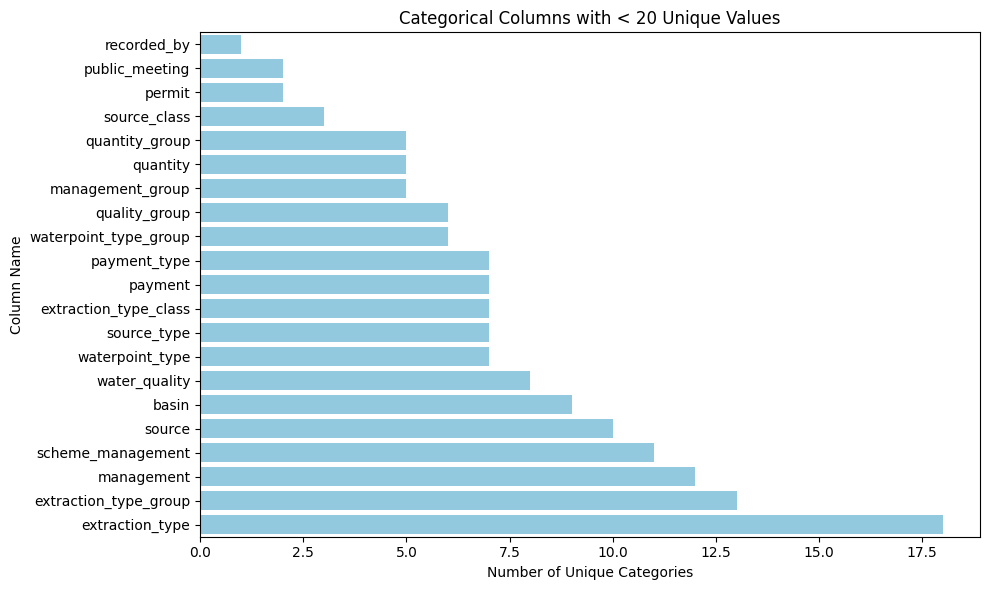

In [15]:
# Filter: only columns with fewer than 20 unique values
cat_uniques = cat_uniques[cat_uniques < 20].sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_uniques.values, y=cat_uniques.index, color="skyblue")
plt.title("Categorical Columns with < 20 Unique Values")
plt.xlabel("Number of Unique Categories")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()

In [16]:
# Value counts for a few key categorical columns
for col in ['quantity', 'water_quality','basin','permit','management']:
    print(f"\n{col} value counts:")
    print(train[col].value_counts().head(5))


quantity value counts:
quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

water_quality value counts:
water_quality
soft        50818
salty        4856
unknown      1876
milky         804
coloured      490
Name: count, dtype: int64

basin value counts:
basin
Lake Victoria      10248
Pangani             8940
Rufiji              7976
Internal            7785
Lake Tanganyika     6432
Name: count, dtype: int64

permit value counts:
permit
True     38852
False    17492
Name: count, dtype: int64

management value counts:
management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
Name: count, dtype: int64


## 🧠 Ticket 1.1.4: Initial Observations

### 📝 First Impressions
- The dataset includes a mix of qualitative (categorical) and quantitative features.
- Many categorical variables are duplicated in grouped form (e.g., `management` and `management_group`, `quantity` and `quantity_group`), reducing overall data variety.
- Some quantitative features are sparsely populated or contain placeholder values (e.g., `construction_year` contains 0s, which is not realistic).
- A few columns (`funder`, `installer`, `wpt_name`, `subvillage`) have thousands of unique values, making them unsuitable for simple aggregation or grouping without cleaning.
- Geo-related features (e.g., `latitude`, `longitude`, `region`, `district_code`) offer potential for spatial analysis and enrichment with external datasets (e.g., weather, population, economy).
- Many binary or low-cardinality categorical variables (e.g., `public_meeting`, `permit`, `quantity`) are likely to be useful in visualizations and predictive modeling.
- The dataset may contain imbalanced classes in the target variable `status_group`, which can affect model performance if not handled appropriately.
- From a data transformation standpoint, there are few quantitative variables. Really, only `amount_tsh` (available amount), `gps_height`, `population`, and `construction_year`, with possible help from `num_private` (although it seems to be mostly 0). 


### ⚠️ Data Quality Issues
- Missing values may not be explicitly coded as `NaN`, but rather as 0 or empty strings (especially in `construction_year`, `gps_height`, `num_private`).
- The `population` field includes many zeros, which may either reflect real values or missing data.

### 🔍 Questions and Hypotheses for Further Investigation
- Are certain regions or districts more likely to have non-functional pumps?
- Does the presence of permits or public meetings correlate with better pump functionality?
- How does pump age (from `construction_year`) relate to failure rate?
- Are specific water extraction types more prone to breakdown?
- Can geographic features (elevation, location) help predict pump status?

In [17]:
# regular missing values
nan_first = train.isnull().sum().sort_values(ascending=False)*100/len(train)
print("~~~ Percent missing values: \n", nan_first.map("{:,.2f}%".format))

~~~ Percent missing values: 
 scheme_name              48.50%
scheme_management         6.53%
installer                 6.15%
funder                    6.12%
public_meeting            5.61%
permit                    5.14%
subvillage                0.62%
wpt_name                  0.00%
latitude                  0.00%
longitude                 0.00%
gps_height                0.00%
date_recorded             0.00%
id                        0.00%
amount_tsh                0.00%
num_private               0.00%
basin                     0.00%
lga                       0.00%
district_code             0.00%
region_code               0.00%
region                    0.00%
recorded_by               0.00%
population                0.00%
ward                      0.00%
construction_year         0.00%
extraction_type           0.00%
extraction_type_group     0.00%
extraction_type_class     0.00%
management                0.00%
management_group          0.00%
payment                   0.00%
payment_ty

In [ ]:
print("~~~ Unique values:\n",train.nunique().sort_values(ascending=False)) 

~~~ Unique values:
 id                       59400
latitude                 57516
longitude                57515
wpt_name                 37399
subvillage               19287
scheme_name               2695
gps_height                2427
installer                 2145
ward                      2092
funder                    1896
population                1049
date_recorded              356
lga                        125
amount_tsh                  97
num_private                 65
construction_year           54
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
management                  12
scheme_management           11
source                      10
basin                        9
water_quality                8
extraction_type_class        7
source_type                  7
waterpoint_type              7
payment                      7
payment_type                 7
waterpoint_type_gro

In [19]:
# Setting 0 to NaN in most numerical variables
train['amount_tsh'] = train['amount_tsh'].replace(0, np.nan)
train['gps_height'] = train['gps_height'].replace(0, np.nan)
train['longitude'] = train['longitude'].replace(0, np.nan)
train['latitude'] = train['latitude'].where(train['latitude'] < -0.5, np.nan) # too close to the equator
# train['population'] = train['population'].replace(0, np.NaN)  ## I worry here that 0 may be true 0, making a histogram
train['construction_year'] = train['construction_year'].replace(0, np.nan) 
# num_private also ignored because I don't know what it means yet
# print again
nan_fixed = train.isnull().sum().sort_values(ascending=False)*100/len(train)
diffs = (nan_fixed - nan_first)
print("~~~ Differences: \n", diffs[diffs>0].map("{:,.1f}%".format)) 
print("~~~ New percent missing values: \n",nan_fixed[nan_fixed>0].map("{:,.3f}%".format))

~~~ Differences: 
 amount_tsh           70.1%
construction_year    34.9%
gps_height           34.4%
latitude              3.1%
longitude             3.1%
dtype: object
~~~ New percent missing values: 
 amount_tsh           70.099%
scheme_name          48.502%
construction_year    34.864%
gps_height           34.407%
scheme_management     6.529%
installer             6.153%
funder                6.123%
public_meeting        5.613%
permit                5.145%
longitude             3.051%
latitude              3.051%
subvillage            0.625%
wpt_name              0.003%
dtype: object


## Missing Values summary
Missing values are significant, particularly in `amount_tsh` *the total static head* (amount water available to waterpoint). I'm less worried about the half missing scheme names, more about the third construction year. GPS height we can probably get from the geo data. After the initial analysis, we're going to figure assess whether any of these are missing not at random.

A well-documented script for dealing with the missing values appears in the src folder, `handle_missing_values.py`

# Unique Values

In [20]:
# Showing unique values for selected variables, probably too many but hey, pixles are cheap
temp = train[['quantity','quantity_group','management','scheme_management','management_group','water_quality','quality_group','waterpoint_type','waterpoint_type_group','payment_type','payment','basin','source','source_class','source_type','extraction_type','extraction_type_class','extraction_type_group','region','region_code','public_meeting','permit']]
for col in temp.columns:
    print("~~~~~~~~~~~~~~~~")
    print(temp[col].value_counts().map("{:,.0f}".format).to_string())

~~~~~~~~~~~~~~~~
quantity
enough          33,186
insufficient    15,129
dry              6,246
seasonal         4,050
unknown            789
~~~~~~~~~~~~~~~~
quantity_group
enough          33,186
insufficient    15,129
dry              6,246
seasonal         4,050
unknown            789
~~~~~~~~~~~~~~~~
management
vwc                 40,507
wug                  6,515
water board          2,933
wua                  2,535
private operator     1,971
parastatal           1,768
water authority        904
other                  844
company                685
unknown                561
other - school          99
trust                   78
~~~~~~~~~~~~~~~~
scheme_management
VWC                 36,793
WUG                  5,206
Water authority      3,153
WUA                  2,883
Water Board          2,748
Parastatal           1,680
Private operator     1,063
Company              1,061
Other                  766
SWC                     97
Trust                   72
~~~~~~~~~~~~~~~~
management_

## Unique values observations
* `quantity` and `quantity_group` have the same number of observations, probably can drop one
* `management` has more info than `management_group`, but still 40k observations for vwc. `scheme_management` seems not to add much, plus has more missing values. Make a dummy variable `vwc` and drop the rest?
* `water_quality` is also mostly the same, quality group very similar
* `waterpoint_type` brings more, but `waterpoint_type_group` is just that, with the two communal standpipes added
* `payment` looks promising, with the respective `_type` simply being the same counts. Drop (unless counts are the same but obs are different)
* `basin`, `region` could feed into our geospatial analysis. I actually like `basin` better because it correlates more closely with the weather aspect and would be more useful in a model with rainfall, for example.
* `source` could also help with a geospatial model using weather. For the overall model, `source_class` is more succinct, binary plus 278 "unknown" (missing values). `source_type` adds other & unknown, hand & machine dtw (down the well?). river & lake.
* The extraction variables are half based on gravity. `extraction_type_class` is the most general, but I think that deciding this will require some domain-specific research.
* We know from earlier that `region_code` has 27 unique values, `region` has 21, and `district_code` 20. This is more granular than the 9 basins, but seems inconsistent. Other geographical options are `lga` (125 unique values), `ward (2092), and subvillage (19287(!)). Decisions, decisions...
* `public_meeting` and `permit` are binary. The former is mostly true, might not be useful. But only about 2/3 of pumps have permits, which may be helpful (although 5% missing values). 

## 🧠 Ticket 1.2.3: Handling Outliers

We began by creating histograms of all numerical data. Significant outliers only appeard in `population`, by this measure. Given the nature of the larger values, we top-coded this measure, creating a ceiling of 1999 for all observations. After normalization it still shows a strong right skew, so we may consider other imputation methods or transformations, depending on our model selection.

Other variables were reasonably behaved, at first glance. We will confirm this as we build the model, transforming variables as indicated.

## Ticket 1.3.1: Create maps of water pump locations

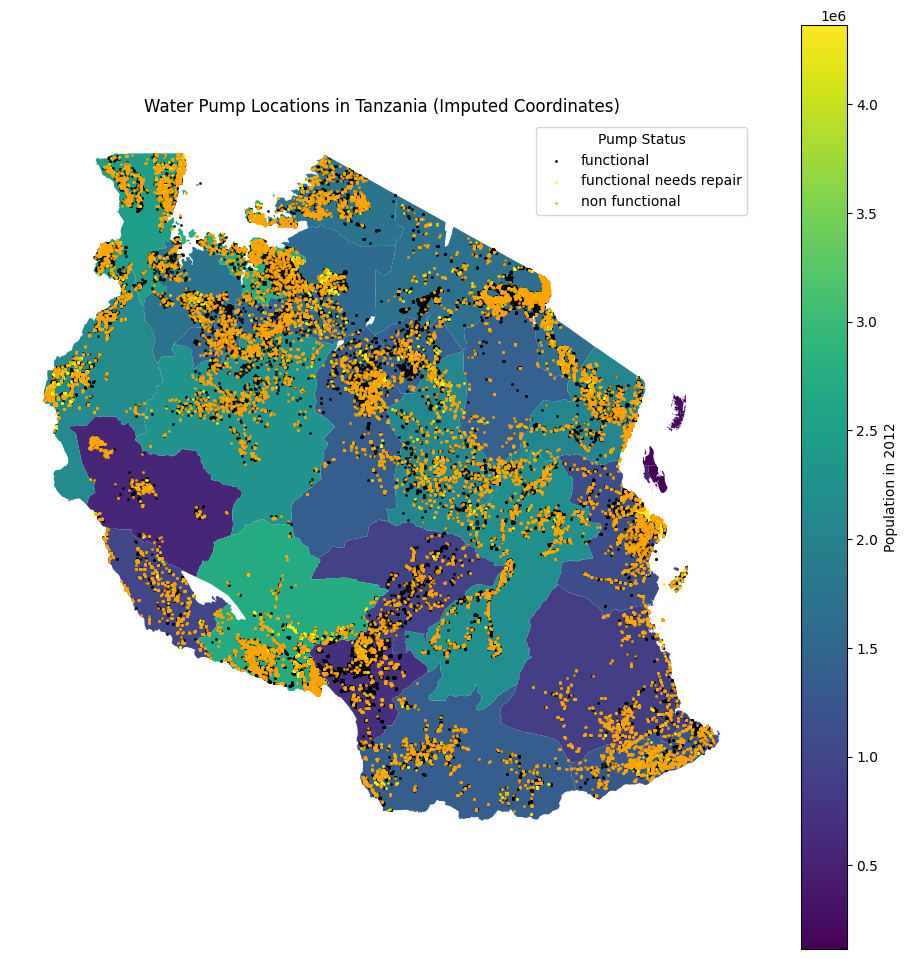

In [21]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Build paths
data_path = os.path.join(os.getcwd(), '..', 'data')   # For the CSV file
gis_path = os.path.join(os.getcwd(), '..', 'gis')     # For the shapefile
out_path = os.path.join(os.getcwd(), '..', 'outputs')     # For the output

# Load your cleaned pump dataset
df = pd.read_csv(os.path.join(data_path, 'cleaned_data_filled_V5.csv'))

# Load the Tanzania shapefile
tanzania = gpd.read_file(os.path.join(gis_path, 'Tanzania.shp'))

# Filter out rows with missing coordinates
df_valid = df.dropna(subset=['longitude', 'latitude'])

# Create GeoDataFrame for pump locations
gdf_pumps = gpd.GeoDataFrame(
    df_valid,
    geometry=gpd.points_from_xy(df_valid.longitude, df_valid.latitude),
    crs="EPSG:4326"
)

# Match CRS with Tanzania shapefile (just in case)
gdf_pumps = gdf_pumps.to_crs(tanzania.crs)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot Tanzania boundaries
tanzania.plot(ax=ax, column='POPULATION', legend=True,
              legend_kwds={"label": "Population in 2012", "orientation": "vertical"})

# Define pump status colors
status_colors = {
    'functional': 'black',
    'functional needs repair': 'yellow',
    'non functional': 'orange'
}

# Plot each status group
for status, color in status_colors.items():
    gdf_pumps[gdf_pumps['status_group'] == status].plot(
        ax=ax, markersize=1.5, alpha=0.7, color=color, label=status
    )

# Final touches
plt.title("Water Pump Locations in Tanzania (Imputed Coordinates)")
plt.legend(title="Pump Status")
plt.axis('off')
plt.show()

# Save the figure
fig.savefig(os.path.join(out_path, "water_pumps_map_V2.png"), dpi=300, bbox_inches='tight')

### 🧭 Ticket 1.3.2: Analyze Regional Patterns in Water Pump Functionality

We begin exploring how water pump distribution and functionality vary across administrative regions.
This includes:
- Count of pumps per region, region_code, and district
- Observing whether some regions are more densely represented

In [22]:
# Count pumps by region, region_code, and district_code
region = train['region'].value_counts()
region_code = train['region_code'].value_counts()
district_code = train['district_code'].value_counts()

# View combinations of region, region_code, and district_code
pd.set_option('display.max_rows', 155)
df = train[['region', 'region_code', 'district_code']]
df.sort_values('region').value_counts()

region         region_code  district_code
Iringa         11           4                2473
Shinyanga      17           3                1401
Kilimanjaro    3            4                1225
Arusha         2            2                1206
Shinyanga      17           1                1196
Kigoma         16           2                1159
Mbeya          12           4                1106
Morogoro       5            1                1094
Mbeya          12           6                1034
Arusha         2            7                1009
Morogoro       5            3                 997
Singida        13           2                 995
Pwani          6            1                 984
Dodoma         1            1                 888
Kilimanjaro    3            3                 877
Kigoma         16           1                 874
Mbeya          12           3                 871
Shinyanga      17           2                 802
Kagera         18           1                 771
Mtwara  

### 🗺️ Ticket 1.3.3: Investigate Geographic Relationships

We explore more localized groupings like `lga`, `ward`, `subvillage`, and `basin`, which may reveal additional patterns related to water pump status and infrastructure.

In [141]:
# Preview extended geo-grouping info
df = train[['region', 'region_code', 'district_code', 'lga', 'subvillage', 'basin', 'ward']]

# Filter pumps in a specific basin
dfbasin = df.loc[df['basin'] == 'Pangani']

# Count pumps by Local Government Authority
train.lga.value_counts()

lga
Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Kigoma Rural         824
Magu                 824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Lushoto              694
Namtumbo             694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560
Iramba               

# 📊 Top 20 District Codes by Pump Count


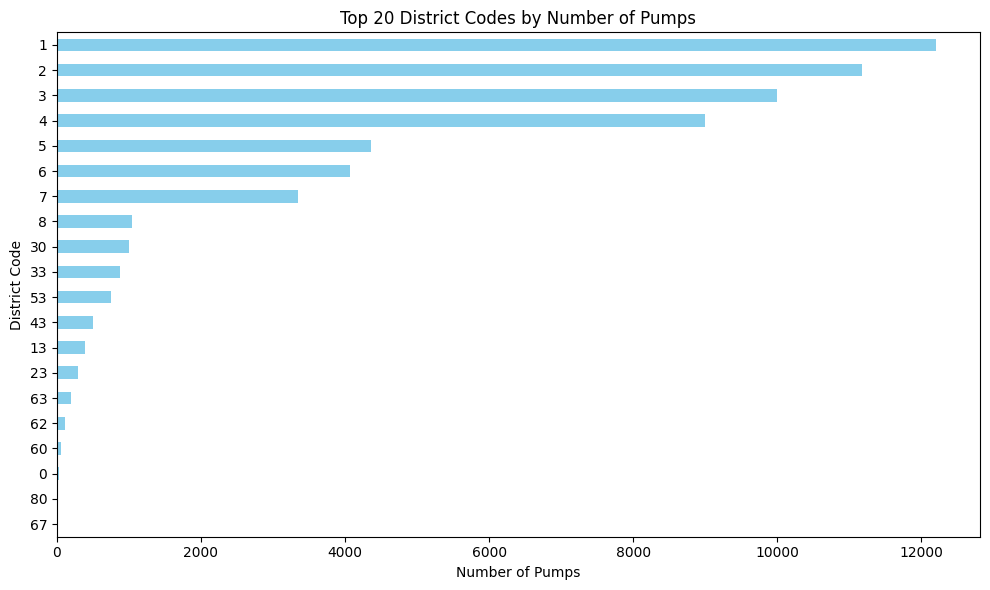

In [23]:
district_code = train['district_code'].value_counts().head(20)

plt.figure(figsize=(10, 6))
district_code.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 District Codes by Number of Pumps')
plt.xlabel('Number of Pumps')
plt.ylabel('District Code')
plt.tight_layout()
plt.show()

# 📊 Pump Distribution by Region


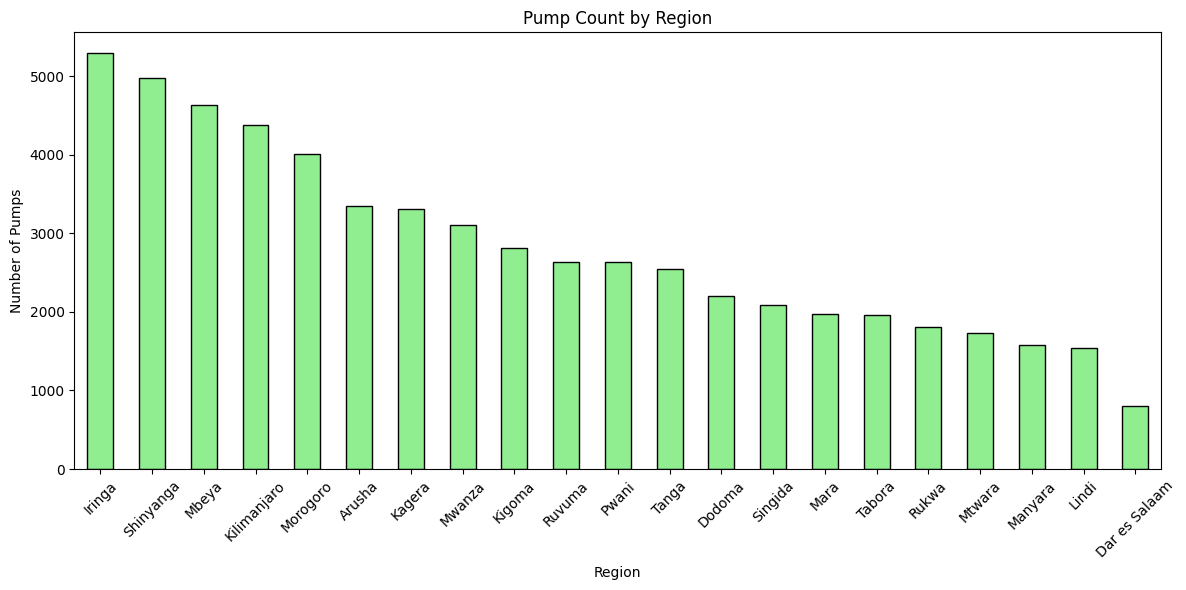

In [24]:
region_counts = train['region'].value_counts()

plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Pump Count by Region')
plt.xlabel('Region')
plt.ylabel('Number of Pumps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Top 20 LGAs by Pump Count


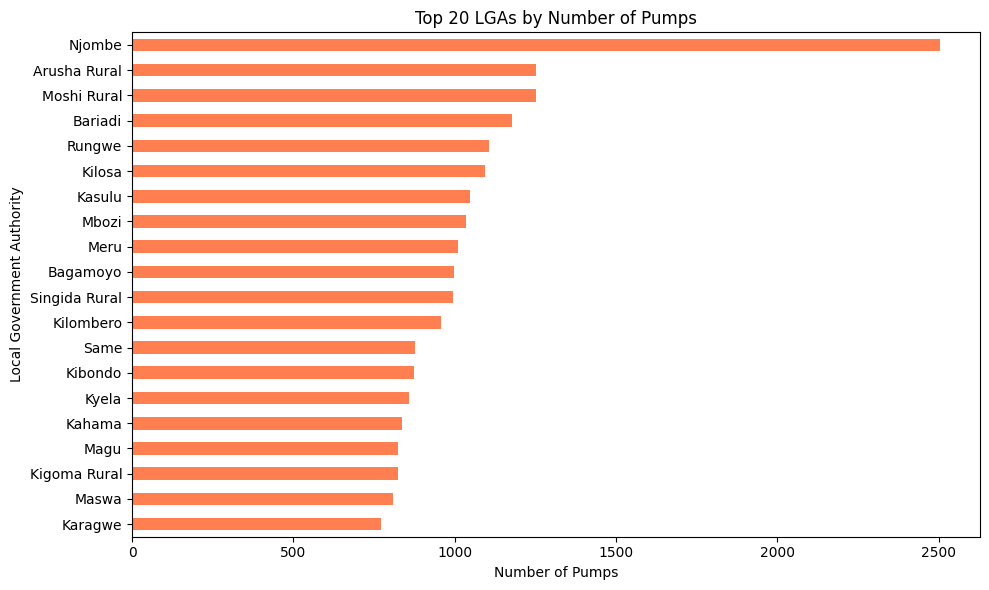

In [25]:
lga_counts = train['lga'].value_counts().head(20)

plt.figure(figsize=(10, 6))
lga_counts.sort_values().plot(kind='barh', color='coral')
plt.title('Top 20 LGAs by Number of Pumps')
plt.xlabel('Number of Pumps')
plt.ylabel('Local Government Authority')
plt.tight_layout()
plt.show()

# 📊 Pump Count by Basin


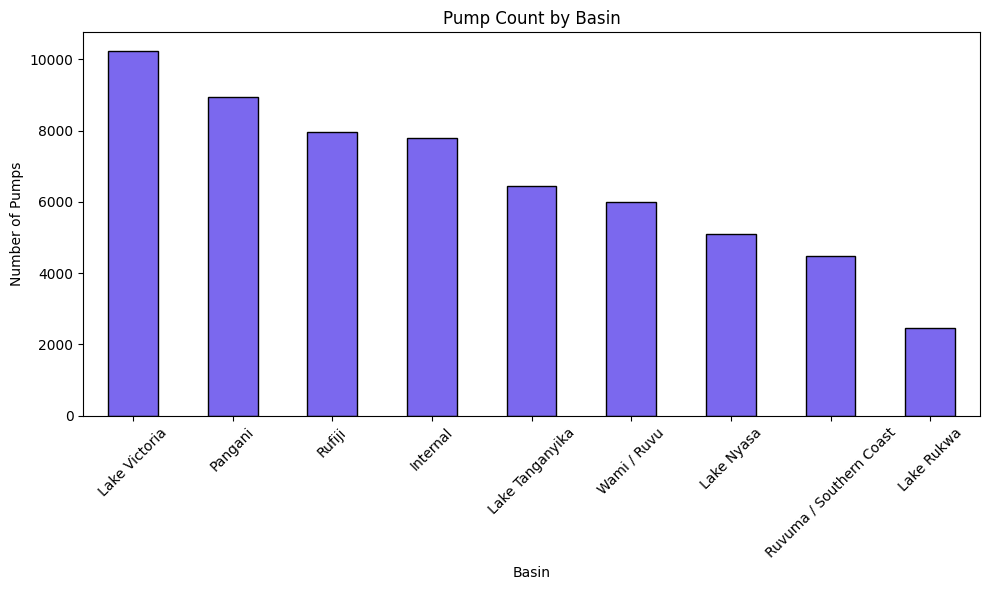

In [26]:
basin_counts = train['basin'].value_counts()

plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')
plt.title('Pump Count by Basin')
plt.xlabel('Basin')
plt.ylabel('Number of Pumps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Non-Functional Pump Percentage by LGA (Top 20 with highest failure rates)


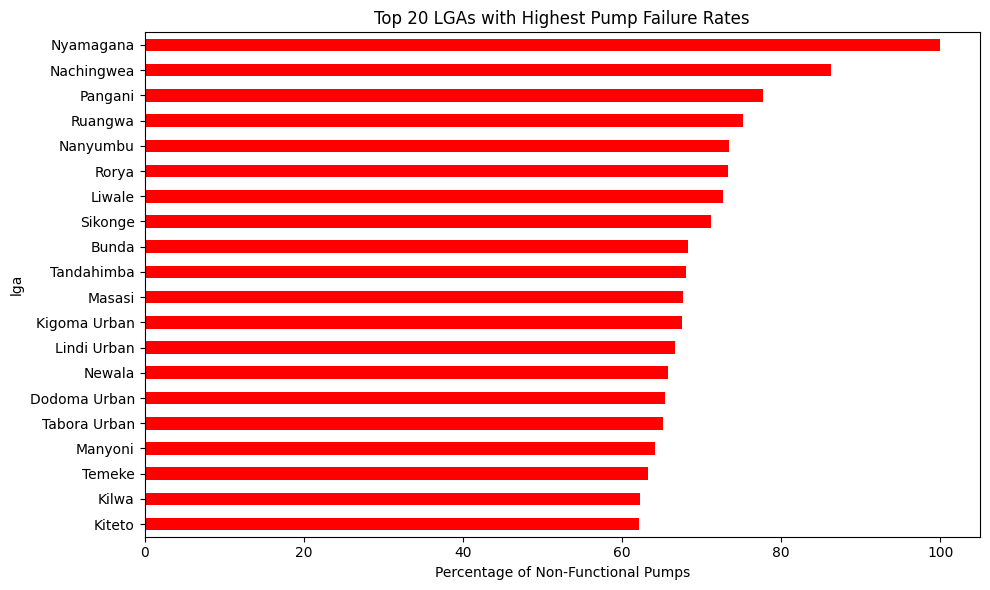

In [28]:

# Count total and non-functional pumps per LGA
train = pd.merge(train, labels, on='id')
lga_func = train.groupby(['lga', 'status_group']).size().unstack().fillna(0)
lga_func['total'] = lga_func.sum(axis=1)
lga_func['non_functional_rate'] = (lga_func['non functional'] / lga_func['total']) * 100

# Sort and plot top 20 LGAs with highest non-functionality rate
top_lga_failures = lga_func.sort_values('non_functional_rate', ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_lga_failures['non_functional_rate'].sort_values().plot(kind='barh', color='red')
plt.xlabel('Percentage of Non-Functional Pumps')
plt.title('Top 20 LGAs with Highest Pump Failure Rates')
plt.tight_layout()
plt.show()